<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [POLR1] - Complexity Syndrome
<!-- DESC --> Illustration of the problem of complexity with the polynomial regression
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Visualizing and understanding under and overfitting
 
## What we're going to do :

We are looking for a polynomial function to approximate the observed series :  
$ y = a_n\cdot x^n + \dots + a_i\cdot x^i + \dots + a_1\cdot x + b $  


## Step 1 - Import and init

In [1]:
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('POLR1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.5
Notebook id          : POLR1
Run time             : Tuesday 26 January 2021, 11:05:28
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/tmp/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Dataset generation

#### Generator :

Nomber of points=100  deg=7 bruit=2000


#### Datasets :

100 points visibles sur 100)


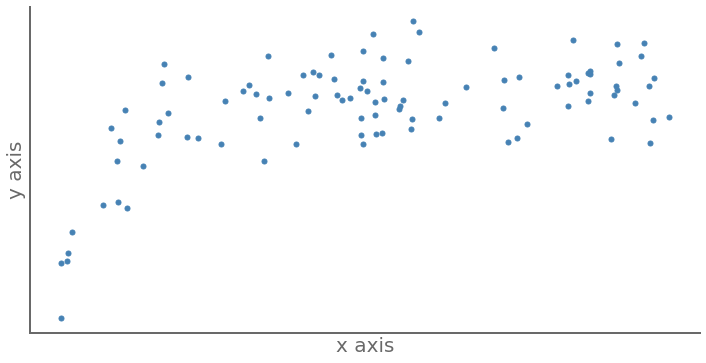

#### Before normalization :

X        :      mean=     +0.2036  std=     +2.8703    min=     -4.9925    max=     +4.9840
Y        :      mean=   -747.1936  std=  +3234.4475    min= -14069.6782    max=  +4809.4644


#### After normalization :

X_norm   :      mean=     +0.0000  std=     +1.0000    min=     -1.8103    max=     +1.6655
Y_norm   :      mean=     -0.0000  std=     +1.0000    min=     -4.1189    max=     +1.7180


In [2]:
# ---- Parameters

n         = 100

xob_min   = -5
xob_max   = 5

deg       =  7
a_min     = -2
a_max     =  2

noise     =  2000

# ---- Train data
#      X,Y              : data
#      X_norm,Y_norm    : normalized data

X = np.random.uniform(xob_min,xob_max,(n,1))
# N = np.random.uniform(-noise,noise,(n,1))
N = noise * np.random.normal(0,1,(n,1))

a = np.random.uniform(a_min,a_max, (deg,))
fy = np.poly1d( a )

Y = fy(X) + N

# ---- Data normalization
#
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
Y_norm = (Y - Y.mean(axis=0)) / Y.std(axis=0)

# ---- Data visualization

width = 12
height = 6
nb_viz = min(2000,n)

def vector_infos(name,V):
    m=V.mean(axis=0).item()
    s=V.std(axis=0).item()
    print("{:8} :      mean={:+12.4f}  std={:+12.4f}    min={:+12.4f}    max={:+12.4f}".format(name,m,s,V.min(),V.max()))


pwk.display_md('#### Generator :')
print(f"Nomber of points={n}  deg={deg} bruit={noise}")

pwk.display_md('#### Datasets :')
print(f"{nb_viz} points visibles sur {n})")
plt.figure(figsize=(width, height))
plt.plot(X[:nb_viz], Y[:nb_viz], '.')
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
pwk.save_fig("01-dataset")
plt.show()

pwk.display_md('#### Before normalization :')
vector_infos('X',X)
vector_infos('Y',Y)

pwk.display_md('#### After normalization :')         
vector_infos('X_norm',X_norm)
vector_infos('Y_norm',Y_norm)


## Step 3 - Polynomial regression with NumPy
### 3.1 - Underfitting

In [3]:
def draw_reg(X_norm, Y_norm, x_hat,fy_hat, size, save_as):
    plt.figure(figsize=size)
    plt.plot(X_norm, Y_norm, '.')

    x_hat = np.linspace(X_norm.min(), X_norm.max(), 100)

    plt.plot(x_hat, fy_hat(x_hat))
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    pwk.save_fig(save_as)
    plt.show()

Nombre de degrés : 1


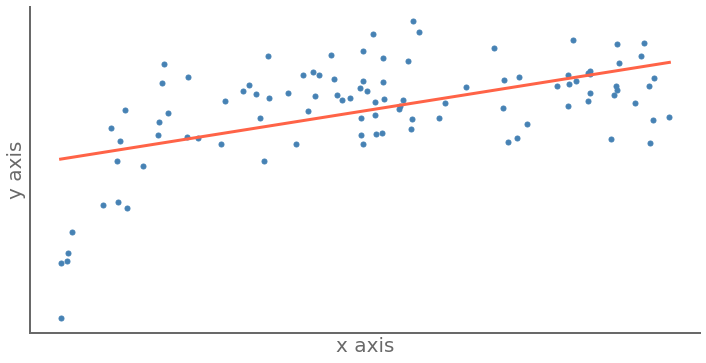

In [4]:
reg_deg=1

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print(f'Nombre de degrés : {reg_deg}')
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], X_norm,fy_hat, (width,height), save_as='02-underfitting')

### 3.2 - Good fitting

Nombre de degrés : 5


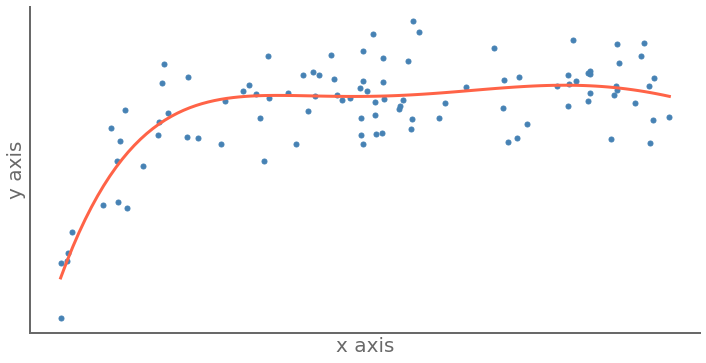

In [5]:
reg_deg=5

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print(f'Nombre de degrés : {reg_deg}')
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], X_norm,fy_hat, (width,height), save_as='03-good_fitting')

### 3.3 - Overfitting

Nombre de degrés : 24


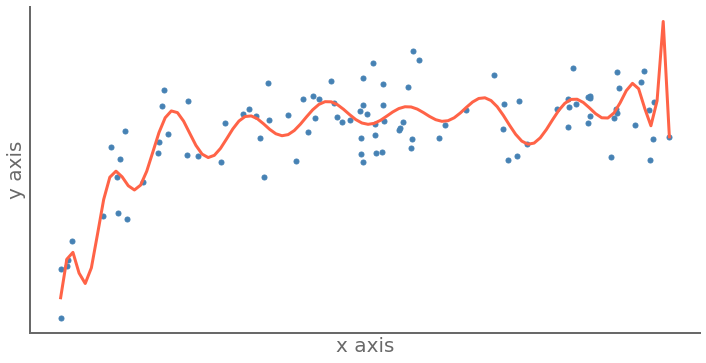

In [6]:
reg_deg=24

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print(f'Nombre de degrés : {reg_deg}')
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], X_norm,fy_hat, (width,height), save_as='04-over_fitting')

In [7]:
pwk.end()

End time is : Tuesday 26 January 2021, 11:05:30
Duration is : 00:00:01 380ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>